In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import os
import random
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.datasets import load_files
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

import keras
from keras.applications import VGG16
from keras import layers
from keras import metrics
from keras.models import load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Flatten
from keras import optimizers
from keras import models
from keras.models import Sequential
from keras.utils import plot_model, np_utils
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with zipfile.ZipFile("/content/drive/My Drive/COLAB/fruits.zip", 'r') as zip_ref:
    zip_ref.extractall('/content')


In [ ]:
img_size = 100
batch_size = 128
channel = 3
learning_rate = 0.0001

In [ ]:
train_dir = '/content/fruits-360_dataset/fruits-360/Training/'
test_dir = '/content/fruits-360_dataset/fruits-360/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,target_labels_test = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  60498
Testing set size :  20622


In [ ]:
no_of_classes = len(np.unique(y_train))
no_of_classes

120

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(image.img_to_array(image.load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)


x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (60498, 100, 100, 3)
Test set shape :  (20622, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

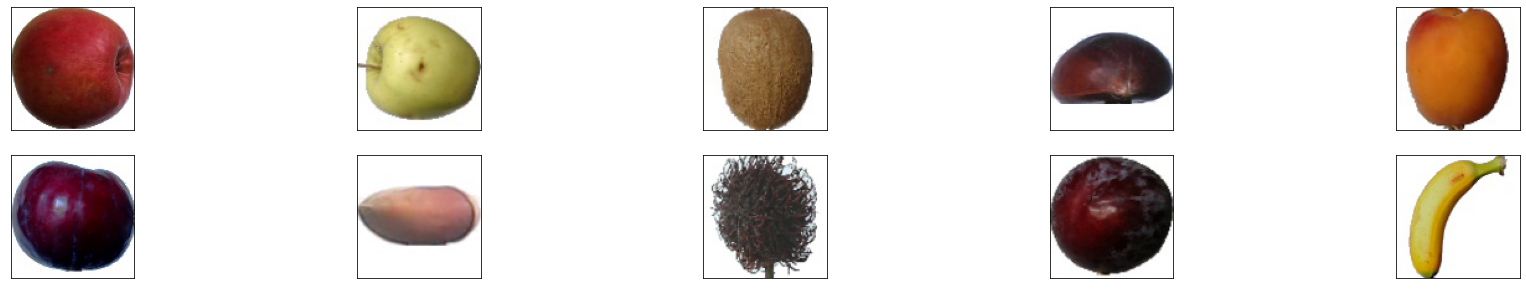

In [ ]:
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [ ]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(img_size, img_size, channel))
base_model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
______________________________________________________________

In [ ]:
# base_model = inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(img_size, img_size, channel))
# base_model.summary()

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = models.Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(no_of_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4719616   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

In [ ]:
model.compile(optimizer=optimizers.adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

train_model = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, verbose=1, validation_split=0.1)

Train on 54448 samples, validate on 6050 samples
Epoch 1/20
54448/54448 [==============================] - 135s 2ms/step - loss: 2.9867 - accuracy: 0.3390 - val_loss: 0.8778 - val_accuracy: 0.8997
Epoch 2/20
54448/54448 [==============================] - 124s 2ms/step - loss: 0.9658 - accuracy: 0.7532 - val_loss: 0.2425 - val_accuracy: 0.9742
Epoch 3/20
54448/54448 [==============================] - 124s 2ms/step - loss: 0.4625 - accuracy: 0.8822 - val_loss: 0.0970 - val_accuracy: 0.9914
Epoch 4/20
54448/54448 [==============================] - 124s 2ms/step - loss: 0.2636 - accuracy: 0.9361 - val_loss: 0.0466 - val_accuracy: 0.9952
Epoch 5/20
54448/54448 [==============================] - 124s 2ms/step - loss: 0.1676 - accuracy: 0.9614 - val_loss: 0.0258 - val_accuracy: 0.9970
Epoch 6/20
54448/54448 [==============================] - 124s 2ms/step - loss: 0.1156 - accuracy: 0.9747 - val_loss: 0.0151 - val_accuracy: 0.9987
Epoch 7/20
54448/54448 [==============================] - 124s 

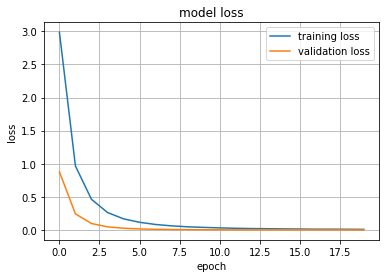

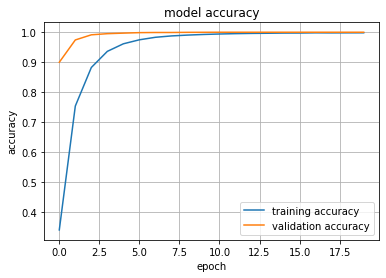

In [ ]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20622/20622 [==============================] - 53s 3ms/step
Test loss: 0.049282337446677996
Test accuracy: 0.983852207660675


In [ ]:
model.save('/content/drive/My Drive/COLAB/trained_vgg16.h5')

In [ ]:
y_pred = model.predict(x_test)
y_pred_label = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred_label)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       164
           1       0.98      1.00      0.99       148
           2       1.00      0.99      1.00       164
           3       1.00      1.00      1.00       164
           4       0.95      1.00      0.98       161
           5       1.00      0.93      0.97       164
           6       1.00      1.00      1.00       152
           7       1.00      1.00      1.00       164
           8       1.00      0.88      0.94       164
           9       0.99      1.00      1.00       144
          10       1.00      1.00      1.00       166
          11       1.00      1.00      1.00       164
          12       1.00      1.00      1.00       219
          13       1.00      0.94      0.97       164
          14       0.96      1.00      0.98       143
          15       1.00      0.96      0.98       166
          16       1.00      0.97      0.98       166
          17       1.00    

In [ ]:
model = load_model('/content/drive/My Drive/COLAB/trained_vgg16.h5')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4719616   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

In [ ]:
#  thử
model = load_model('/content/drive/My Drive/COLAB/trained_vgg16.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
img = image.load_img('/content/drive/My Drive/COLAB/test_images/197_100.jpg', target_size=(100, 100))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes, target_labels[classes])

[105] ['Raspberry']


In [ ]:
target_labels_test[112]

'Tomato 1'